In [51]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

from models import TwoLevelModel
from src import MetaInfo, Wrapper
from sklearn.ensemble import RandomForestClassifier


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# from src import MetaInfo
# 
# train_data = pd.read_parquet("data/train.parquet")
# test_data = pd.read_parquet("data/test.parquet")
# 
# train_manager = MetaInfo(train_data)
# X_train = train_manager.generate_meta_features()
# y_train = train_manager.get_labels()
# 
# test_manager = MetaInfo(test_data)
# X_test = test_manager.generate_meta_features()
# 
# y_train_bin = y_train['buy_post']
# y_train_float = y_train['date_diff_post']
# 
# from catboost import CatBoostClassifier, CatBoostRegressor
# 
# cb_classifier = CatBoostClassifier(iterations=200)
# cb_regressor = CatBoostRegressor(iterations=200)
# 
# two_level_model = TwoLevelModel(
#     classifier=cb_classifier,
#     regressor=cb_regressor,
#     train_data=X_train,
#     test_data=X_test,
#     train_bin_labels=y_train_bin,
#     train_float_labels=y_train_float
# )
# 
# two_level_model.fit()
# 
# res = two_level_model.get_dataframe_prediction()
# 
# print("Hui досчиталась")

In [45]:
clf = RandomForestClassifier(n_estimators=120)

In [48]:
train_data = pd.read_parquet("data/train.parquet")
test_data = pd.read_parquet("data/test.parquet")


In [52]:
train_manager = MetaInfo(train_data)
X_train = train_manager.generate_meta_features()
y_train = train_manager.get_labels()
['year_median', 'year_max', 'year_min',
 'month_median', 'month_max', 'month_min', 'num_unique_years', 'num_unique_months',
 'n_unique_checks_gt_5', 'n_unique_checks_gt_10', 'n_unique_checks_gt_20', 'n_unique_days_gt_5', 'n_unique_days_gt_10',
 'n_unique_days_gt_20', 'num_different_formats']

In [53]:
X_train

,sum_revenue_abs,sum_revenue_log,revenue_max,revenue_mean,revenue_min,revenue_max_log,revenue_mean_log,revenue_min_log,year_max,year_median,...,num_unique_years,num_unique_months,num_unique_dates,n_unique_checks_gt_5,n_unique_checks_gt_10,n_unique_checks_gt_20,n_unique_days_gt_5,n_unique_days_gt_10,n_unique_days_gt_20,num_different_formats
customer_id,,,,,,,,,,,,,,,,,,,,,
29891,5087.35,8.534709,439.98,149.627941,1.00,6.089000,5.014813,0.693147,2023,2022,...,2,3,19,True,True,True,True,True,False,2
30477,5675.60,8.644108,399.99,93.042623,0.39,5.993936,4.543748,0.329304,2022,2022,...,1,2,21,True,True,True,True,True,True,1
31426,9393.59,9.147889,854.99,109.227791,1.00,6.752259,4.702549,0.693147,2023,2023,...,1,3,20,True,True,True,True,True,False,1
44491,514.90,6.245913,229.99,51.490000,19.99,5.442374,3.960623,3.044046,2023,2023,...,1,2,3,False,False,False,False,False,False,2
44939,1664.83,7.418079,267.97,66.593200,1.00,5.594600,4.213507,0.693147,2022,2022,...,1,1,3,False,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46624509,935.90,6.842577,189.99,85.081818,1.00,5.252221,4.455298,0.693147,2023,2023,...,1,2,2,False,False,False,False,False,False,1
46625265,1199.87,7.090802,169.98,92.297692,49.99,5.141547,4.535795,3.931630,2023,2023,...,1,1,1,False,False,False,False,False,False,1
46639170,1089.92,6.994777,179.99,99.083636,1.00,5.198442,4.606006,0.693147,2023,2023,...,1,1,1,False,False,False,False,False,False,1


In [58]:
test_manager = MetaInfo(test_data)
X_test = test_manager.generate_meta_features()

In [47]:
Wrapper(clf, X_train.values, y_train['buy_post'].values, X_test).crossval(5)

KeyboardInterrupt: 

In [9]:
y_train_bin = y_train['buy_post']
y_train_float = y_train['date_diff_post']

In [100]:
from catboost import CatBoostClassifier, CatBoostRegressor

cb_classifier = CatBoostClassifier(
    cat_features=['year_median', 'year_max', 'year_min',
                  'month_median', 'month_max', 'month_min', 'num_unique_years', 'num_unique_months',
                  'n_unique_checks_gt_5', 'n_unique_checks_gt_10', 'n_unique_checks_gt_20', 'n_unique_days_gt_5',
                  'n_unique_days_gt_10', 'n_unique_days_gt_20', 'num_different_formats'],
    verbose=100,
    task_type="GPU",
    devices='0:1'
)
# cb_regressor = CatBoostRegressor(iterations=100)

In [101]:
cb_classifier.fit(X_train, y_train['buy_post'])

CatBoostError: /Users/zomb-ml-platform-msk/go-agent-21.2.0/pipelines/BuildMaster/catboost.git/catboost/libs/train_lib/trainer_env.cpp:9: Environment for task type [GPU] not found

In [27]:
two_level_model = TwoLevelModel(
classifier = cb_classifier,
regressor = cb_regressor,
train_data = X_train,
test_data = X_test,
train_bin_labels = y_train_bin,
train_float_labels = y_train_float
)

In [80]:
import numpy as np

In [96]:
prediction = cb_classifier.predict_proba(X_test)
# plt.hist(np.array((prediction[:,1] > 0.6),dtype=int))

In [97]:
import pandas as pd

prediction = np.array((prediction[:, 1] > 0.65))
# np.array(prediction,dtype=int)
submit = pd.DataFrame(np.array(prediction, dtype=int), columns=['buy_post'])
submit['customer_id'] = X_test.index
submit['date_diff_post'] = 1
submit = submit[['customer_id', 'date_diff_post', 'buy_post']]

In [98]:
submit

,customer_id,date_diff_post,buy_post
0,52341,1,1
1,69175,1,1
2,73427,1,1
3,134577,1,0
4,156357,1,0
...,...,...,...
112329,46540272,1,0
112330,46569275,1,0
112331,46601088,1,1
112332,46632765,1,1


In [99]:
submit.to_csv('submition_v4.csv', index=False, sep=';')

In [68]:
X_test.drop(columns=list(range(27)), axis=0)

KeyError: '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26] not found in axis'

In [74]:
wrapper = Wrapper(
model = cb_classifier,
X_train = X_train,
X_test = None,
y_train = y_train_bin
)

In [75]:
wrapper.crossval(5)

Learning rate set to 0.13305
0:	learn: 0.6479587	total: 430ms	remaining: 7m 9s
100:	learn: 0.5223956	total: 26.8s	remaining: 3m 58s


KeyboardInterrupt: 

In [28]:
print('hui')
two_level_model.fit()

hui
Learning rate set to 0.5
0:	learn: 0.5902511	total: 26.9ms	remaining: 2.67s
1:	learn: 0.5584582	total: 45.5ms	remaining: 2.23s
2:	learn: 0.5462867	total: 60.9ms	remaining: 1.97s
3:	learn: 0.5420069	total: 77.4ms	remaining: 1.86s
4:	learn: 0.5401867	total: 94.4ms	remaining: 1.79s
5:	learn: 0.5393192	total: 110ms	remaining: 1.72s
6:	learn: 0.5389669	total: 126ms	remaining: 1.67s
7:	learn: 0.5387978	total: 148ms	remaining: 1.71s
8:	learn: 0.5387155	total: 189ms	remaining: 1.91s
9:	learn: 0.5386442	total: 261ms	remaining: 2.35s
10:	learn: 0.5386151	total: 329ms	remaining: 2.66s
11:	learn: 0.5385796	total: 364ms	remaining: 2.67s
12:	learn: 0.5385491	total: 400ms	remaining: 2.68s
13:	learn: 0.5385311	total: 430ms	remaining: 2.64s
14:	learn: 0.5384519	total: 464ms	remaining: 2.63s
15:	learn: 0.5384151	total: 504ms	remaining: 2.65s
16:	learn: 0.5383833	total: 553ms	remaining: 2.7s
17:	learn: 0.5383588	total: 581ms	remaining: 2.65s
18:	learn: 0.5383399	total: 641ms	remaining: 2.73s
19:	lear

In [5]:
train_data.describe()

,customer_id,date_diff_post,buy_post,revenue,startdatetime,ownareaall_sqm
count,1.212938e+07,9.660867e+06,1.212938e+07,1.212938e+07,12129384,1.212938e+07
mean,1.980954e+07,2.048039e+01,7.964846e-01,1.067995e+02,2023-02-20 12:19:13.394690048,2.155130e+02
min,2.989100e+04,0.000000e+00,0.000000e+00,1.000000e-02,2022-09-02 00:00:39,0.000000e+00
25%,1.010852e+07,8.000000e+00,1.000000e+00,4.499000e+01,2022-12-06 16:12:06,1.049000e+02
50%,2.127459e+07,1.700000e+01,1.000000e+00,7.998000e+01,2023-02-22 11:04:22,2.104000e+02
75%,2.803856e+07,3.000000e+01,1.000000e+00,1.317725e+02,2023-05-09 18:48:02,3.000000e+02
max,4.666180e+07,6.000000e+01,1.000000e+00,1.449971e+04,2023-08-01 23:57:46,9.787000e+02
std,1.138904e+07,1.527091e+01,4.026126e-01,1.074385e+02,NaN,1.225907e+02


In [8]:
# train_data[train_data['customer_id'] == 45067]


In [9]:
temp = train_data.groupby('ownareaall_sqm')['format_name'].nunique()

In [10]:
temp[temp == 5]

ownareaall_sqm
300.0    5
Name: format_name, dtype: int64

In [12]:
manager = MetaInfo(train_data)

In [152]:
new_features = manager.generate_meta_features()

In [153]:
new_features

,unique_places,orders_count,total_spend,avg_bill,unique_days
customer_id,,,,,
29891,2,25,5087.35,203.494000,19
30477,1,25,5675.60,227.024000,21
31426,1,24,9393.59,391.399583,20
44491,2,4,514.90,128.725000,3
44939,2,3,1664.83,554.943333,3
...,...,...,...,...,...
46624509,1,3,935.90,311.966667,2
46625265,1,3,1199.87,399.956667,1
46639170,1,3,1089.92,363.306667,1


In [154]:

labels = manager.get_labels()
labels

,date_diff_post,buy_post
customer_id,,
29891,9.0,1
30477,10.0,1
31426,4.0,1
44491,42.0,1
44939,9.0,1
...,...,...
46624509,NaN,0
46625265,NaN,0
46639170,10.0,1


In [126]:
difference_in_time = temp.diff()

In [131]:
# difference_in_time.groupby(difference_in_time).mean()
train_data['date_diff'] = train_data.groupby("customer_id")['startdatetime'].diff()

In [121]:
item[1].diff().mean()

Timedelta('0 days 14:10:27.576470588')

In [51]:
t = train_data.groupby('dish_name')['revenue'].median()

In [52]:
t2 = train_data['revenue'] - train_data['dish_name'].map(t)

<AxesSubplot:>

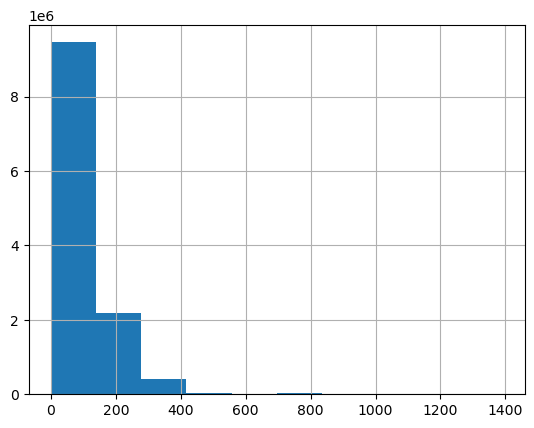

In [55]:
train_data['dish_name'].map(t).hist()